Importation des bibliothèques

In [1]:
import numpy as np # pour les calculs numériques
import pandas as pd # pour l'analyse de données
import matplotlib.pyplot as plt # pour la visualisation
import seaborn as sns # pour la visualisation

Chargement du jeu de données

In [2]:
data = pd.read_excel("baccalaureat-2022-classement-des-etablissements-par-ordre-de-merite.xlsx")

Quelques informations générales sur notre jeu de données

In [7]:
data

,RANG,CODE ETABL.,ETABLISSEMENT,TYPE ETABL.,CODE DREN,LIB. DREN,INSCRITS,PRESENTS,ADMIS,%TAUX 2022,%TAUX 2021
0,1,653,LYCEE SCIENTIFIQUE YAMOUSSOUKRO,PUBLIC,20,YAMOUSSOUKRO,216,216,216,100.0,100.00
1,2,41607,ECOLE SECONDAIRE MAKORE / BINGERVILLE,PRIVE,12,ABIDJAN 1,22,22,22,100.0,91.67
2,3,39698,ECOLE SECONDAIRE ETIMOE / BINGERVILLE,PRIVE,12,ABIDJAN 1,9,9,9,100.0,100.00
3,4,58140,GROUPE SCOLAIRE IFORAS,PRIVE,12,ABIDJAN 1,8,8,8,100.0,41.18
4,5,310715,COLLEGE PRIVE TECHNIQUE HARMATTAN D'ANYAMA,PRIVE,41,ABIDJAN 4,3,3,3,100.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2071,2072,CS0408,ONG LE DJUABLIN,CS,11,ABENGOUROU,8,7,0,0.0,0.00
2072,2073,CS0303,ONG SERVIR MA COMMUNAUTE,CS,12,ABIDJAN 1,5,4,0,0.0,0.00
2073,2074,CS0433,TRESORS CACHESAMUEL,CS,40,ABIDJAN 3,15,15,0,0.0,0.00
2074,2075,CS0109,UNESCO BIENVEILLANCE,CS,12,ABIDJAN 1,11,9,0,0.0,0.00


In [19]:
data['TYPE ETABL.'].sort_values().unique()

array(['CL-DREN', 'CS', 'PRIVE', 'PUBLIC'], dtype=object)

In [21]:
data['LIB. DREN'].sort_values().unique()

array(['ABENGOUROU', 'ABIDJAN 1', 'ABIDJAN 2', 'ABIDJAN 3', 'ABIDJAN 4',
       'ABOISSO', 'ADZOPE', 'AGBOVILLE', 'BONDOUKOU', 'BONGOUANOU',
       'BOUAFLE', 'BOUAKE 1', 'BOUAKE 2', 'BOUNA', 'BOUNDIALI', 'DABOU',
       'DALOA', 'DANANE', 'DAOUKRO', 'DIMBOKRO', 'DIVO', 'DUEKOUE',
       'FERKESSEDOUGOU', 'GAGNOA', 'GRAND BASSAM', 'GUIGLO', 'ISSIA',
       'KATIOLA', 'KORHOGO', 'MAN', 'MANKONO', 'MINIGNAN', 'ODIENNE',
       'SAN-PEDRO', 'SASSANDRA', 'SEGUELA', 'SINFRA', 'SOUBRE',
       'TIASSALE', 'TOUBA', 'YAMOUSSOUKRO'], dtype=object)

In [23]:
data['LIB. DREN'].nunique()

41

In [27]:
data['LIB. DREN'].value_counts(normalize=True)

ABIDJAN 3         0.136320
ABIDJAN 4         0.105010
ABIDJAN 1         0.076108
ABIDJAN 2         0.067919
DALOA             0.053468
YAMOUSSOUKRO      0.035164
GAGNOA            0.030829
DIVO              0.030347
KORHOGO           0.028420
BOUAKE 2          0.027938
SOUBRE            0.027938
SAN-PEDRO         0.027938
BONDOUKOU         0.024566
MAN               0.021676
DABOU             0.020231
ABENGOUROU        0.018786
ADZOPE            0.018786
BOUAFLE           0.017823
DUEKOUE           0.017341
BOUAKE 1          0.017341
GRAND BASSAM      0.017341
BONGOUANOU        0.016378
AGBOVILLE         0.015414
TIASSALE          0.013487
DAOUKRO           0.013006
ABOISSO           0.013006
GUIGLO            0.012042
KATIOLA           0.010597
ISSIA             0.010597
SINFRA            0.009634
BOUNDIALI         0.008671
FERKESSEDOUGOU    0.008189
MANKONO           0.007707
DANANE            0.007225
SASSANDRA         0.007225
SEGUELA           0.006262
ODIENNE           0.005780
D

In [3]:
data.sample(5)

,RANG,CODE ETABL.,ETABLISSEMENT,TYPE ETABL.,CODE DREN,LIB. DREN,INSCRITS,PRESENTS,ADMIS,%TAUX 2022,%TAUX 2021
774,775,12115,COLLEGE LE ROI DAVID YOPOUGON,PRIVE,40,ABIDJAN 3,82,81,25,30.86,24.74
664,665,808,LYCEE MODERNE BAD DE SEGUELA,PUBLIC,29,SEGUELA,99,97,32,32.99,32.22
1428,1429,716,COLLEGE N'ZI COMOE DIMBOKRO,PRIVE,30,DIMBOKRO,130,125,25,20.00,28.87
1193,1194,12204,COLLEGE EULALIE BLAH ABOBO CLOUETCHA,PRIVE,41,ABIDJAN 4,286,285,70,24.56,24.79
993,994,37089,INSTITUT INTERNATIONAL DE FORMATION TECHNIQUE ...,PRIVE,40,ABIDJAN 3,91,91,25,27.47,42.42


In [29]:
data_float = data.select_dtypes(include='number')
data_float.describe()

,RANG,CODE DREN,INSCRITS,PRESENTS,ADMIS,%TAUX 2022,%TAUX 2021
count,2076.0000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000,2076.000000
mean,1038.5000,30.844894,156.813584,154.068882,47.421002,28.125949,21.948285
std,599.4339,12.981916,246.221973,230.819743,67.366890,16.134534,19.124298
min,1.0000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,519.7500,19.000000,42.000000,41.000000,8.000000,17.617500,0.000000
50%,1038.5000,31.000000,101.000000,99.000000,26.000000,26.800000,20.370000
75%,1557.2500,41.000000,210.000000,207.000000,60.250000,36.000000,33.330000
max,2076.0000,56.000000,8710.000000,7818.000000,1104.000000,100.000000,100.000000


In [28]:
data_string = data.select_dtypes(include='object')
data_string.describe()

,CODE ETABL.,ETABLISSEMENT,TYPE ETABL.,LIB. DREN
count,2076,2076,2076,2076
unique,2076,2068,4,41
top,653,COLLEGE LE PANTHEON WILLIAMSVILLE,PRIVE,ABIDJAN 3
freq,1,2,1519,283


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RANG           2076 non-null   int64  
 1   CODE ETABL.    2076 non-null   object 
 2   ETABLISSEMENT  2076 non-null   object 
 3   TYPE ETABL.    2076 non-null   object 
 4   CODE DREN      2076 non-null   int64  
 5   LIB. DREN      2076 non-null   object 
 6   INSCRITS       2076 non-null   int64  
 7   PRESENTS       2076 non-null   int64  
 8   ADMIS          2076 non-null   int64  
 9   %TAUX 2022     2076 non-null   float64
 10  %TAUX 2021     2076 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 178.5+ KB


Visualisation des données

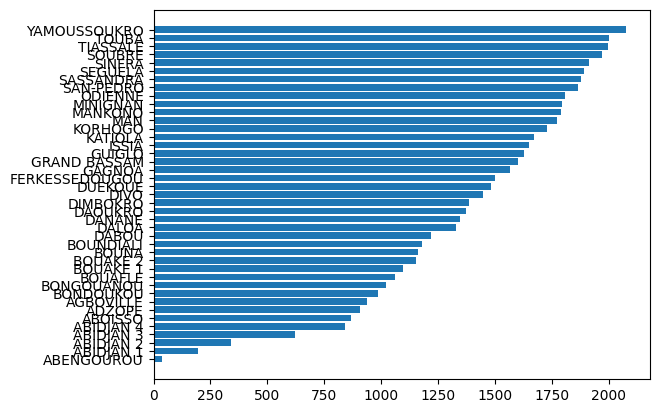

In [53]:
rang = data['RANG']
taux_2022 = data['%TAUX 2022']
lib_dren = data['LIB. DREN'].sort_values()
# plt.plot(rang, taux_2022)
plt.barh(lib_dren, rang)
plt.show()

Taux moyen en 2022

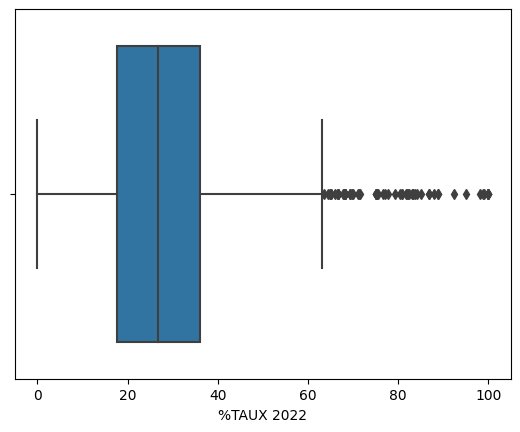

In [49]:
sns.boxplot(data=data, x='%TAUX 2022')
plt.show()

Répartition des types d'établissements

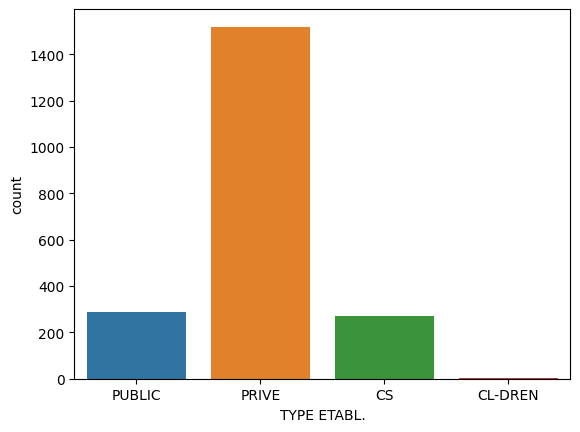

In [48]:
sns.countplot(data=data, x='TYPE ETABL.')
plt.show()

<AxesSubplot: xlabel='TYPE ETABL.', ylabel='%TAUX 2022'>

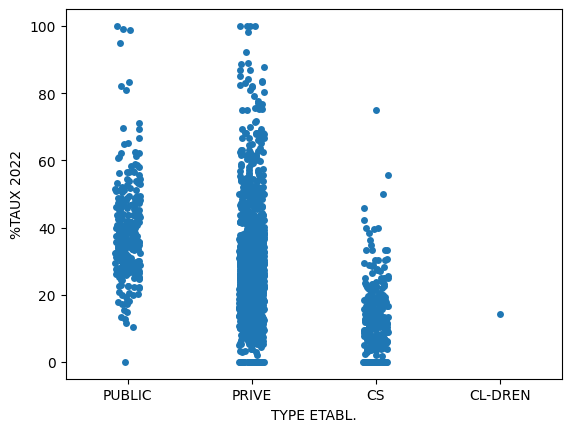

In [52]:
sns.stripplot(data=data, x='TYPE ETABL.', y='%TAUX 2022')

Matrice des corrélations

C:\Users\Juste KOUASSI\AppData\Local\Temp\ipykernel_13800\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

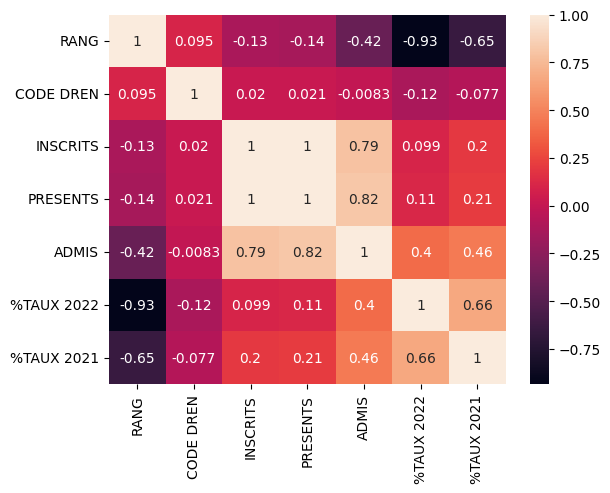

In [50]:
sns.heatmap(data.corr(), annot=True)